In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import h5py
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import dlc_utils
import av
import math 
from IPython.display import HTML
from importlib import reload
from multiprocessing import Pool
import re 

In [3]:
reload(dlc_utils)

<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [4]:
#dlc_directory = '/volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'
dlc_directory = '/projects/b1118/behaviorvideos/'
experiment_folders = [folder for folder in os.listdir(dlc_directory) if '_H' in folder]

In [13]:
##to fix non leaving zeros in dlc output files if needed 
sessions_renamed = []
renamed_files_by_session = {}
for folder in experiment_folders:
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = [file for file in os.listdir(output_directory) if file.endswith('000.h5')]
    #zfill single digit behavCam identifiers 
    to_rename = []
    new_name = []
    for file in dlc_output_files:
        if not re.match(r'behavCam\d\d', file):
            to_rename.append(file)
            new_name.append('behavCam'+re.match(r'behavCam\d', file).group().strip('behavCam').zfill(2)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5')
            print(file+'   '+'behavCam'+re.match(r'behavCam\d', file).group().strip('behavCam').zfill(2)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5')
            os.rename(output_directory+file, output_directory+'behavCam'+re.match(r'behavCam\d', file).group().strip('behavCam').zfill(2)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5')
            
    if len(to_rename)>0:
        sessions_renamed.append(session_name)
        renamed_files_by_session[session_name] = file+'   '+'behavCam'+re.match(r'behavCam\d', file).group().strip('behavCam').zfill(2)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5'

GRIN012_H17_M46_S35
GRIN038_H11_M57_S0
GRIN018_H17_M41_S43
GRIN035_H13_M50_S58
behavCam8DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam08DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam2DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam5DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam9DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam09DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam6DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam06DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam1DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam3DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam7DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5   behavCam07DLC

In [5]:
sessions_renamed = ['GRIN035_H13_M50_S58','GRIN034_H16_M13_S22','GRIN039_H12_M26_S54','GRIN035_H14_M40_S34','GRIN034_H19_M0_S18']

In [6]:
## compile coordinates for all behavCam videos in session
time_stamp_for_output = '02212021'

In [9]:
for folder in tqdm(sessions_renamed):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = os.listdir(output_directory)
    dlc_output_files.sort()    
    names = []
    
    dlc_dfs = []
    coordinates_dfs = []
    
    for output_file in dlc_output_files:
        if output_file.endswith('000.h5'):
            print(output_file)
            dlc_output = pd.read_hdf(output_directory + output_file)
            
            ## before calculating centroid remove regions where 
            # find regions where likelihood is less than .9995
            for body_part in list(set(dlc_output.columns.get_level_values(1))):
                low_likelihood_indicies = dlc_output.loc[dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][body_part]['likelihood']<0.9995].index
                #remove coordinate values from low likelihood regions 
                dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', body_part, 'x')]=np.nan
                dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', body_part, 'y')]=np.nan
          
            dlc_output = dlc_utils.calculate_centroid(dlc_output)
            #coordinates_delta_df = dlc_utils.difference_df(dlc_output)
            #df_columns = list(dlc_output.columns)
            
            coordinates_dfs.append(dlc_output)
            names.append(output_file)

    ## save compiled coordinates to df
    coordinates_compiled = pd.concat(coordinates_dfs, keys=names)
    coordinates_compiled.to_csv(output_directory+session_name+'_coordinates_compiled_'+time_stamp_for_output+'.csv')

  0%|          | 0/5 [00:00<?, ?it/s]

GRIN035_H13_M50_S58
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam06DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam07DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam08DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam09DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam10DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam11DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam12DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam13DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam14DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam15DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam16DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam17DLC_resnet

 20%|██        | 1/5 [04:39<18:38, 279.51s/it]

GRIN034_H16_M13_S22
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam06DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam07DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam08DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam09DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam10DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam11DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam12DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam13DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam14DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam15DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam16DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam17DLC_resnet

 40%|████      | 2/5 [09:17<13:57, 279.11s/it]

GRIN039_H12_M26_S54
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam06DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam07DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam08DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam09DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam10DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam11DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam12DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam13DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam14DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam15DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam16DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam17DLC_resnet

 60%|██████    | 3/5 [17:08<11:13, 336.54s/it]

GRIN035_H14_M40_S34
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam06DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam07DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam08DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam09DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam10DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam11DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam12DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam13DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam14DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam15DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam16DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam17DLC_resnet

 80%|████████  | 4/5 [21:33<05:15, 315.22s/it]

GRIN034_H19_M0_S18
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam06DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam07DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam08DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam09DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam10DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam11DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam12DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam13DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam14DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam15DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam16DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
behavCam17DLC_resnet5

100%|██████████| 5/5 [26:13<00:00, 314.79s/it]


In [13]:
##calculate velocity from compiled coordinates
for folder in tqdm(sessions_renamed):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(session_name)
    print('calculating velocity')
    dlc_output = pd.read_csv(output_directory+session_name+'_coordinates_compiled_'+time_stamp_for_output+'.csv', header= [0, 1, 2]).drop(['Unnamed: 1_level_0'], axis=1)      

    # get difference data frame 
    df_columns = list(dlc_output.columns)
    body_parts = list(set([df_columns[item][1] for item in range(len(df_columns))]))
    body_parts.remove('bodyparts')
    # change in x and y between samples
    coordinates_delta_df = pd.concat([dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][body_part][['x', 'y']].diff() for body_part in body_parts], 
          keys=body_parts, axis=1)
    # velocity = sqrt((change in x)**2+(change in y)**2)
    velocity_df = pd.DataFrame({k:v for (k,v) in zip(body_parts, [np.array([math.sqrt(z) for z in (coordinates_delta_df[body_part]['x'].values**2)+(coordinates_delta_df[body_part]['y'].values**2)]) 
                     for body_part in body_parts])})
    # add in likelihood columns
    for body_part in body_parts:
        velocity_df[body_part+'_likelihood']=dlc_output[df_columns[1][0]][body_part]['likelihood'].values

    #save compiled session 
    velocity_df.to_hdf(output_directory+session_name+'_velocity_compiled_session_'+time_stamp_for_output+'.h5', key='df')
    velocity_df.to_csv(output_directory+session_name+'_velocity_compiled_session_'+time_stamp_for_output+'.csv')

  0%|          | 0/5 [00:00<?, ?it/s]/home/jma819/.conda/envs/jupyter_env/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


GRIN035_H13_M50_S58
calculating velocity


 20%|██        | 1/5 [00:00<00:02,  1.83it/s]

GRIN034_H16_M13_S22
calculating velocity


 40%|████      | 2/5 [00:01<00:01,  1.77it/s]

GRIN039_H12_M26_S54
calculating velocity


 60%|██████    | 3/5 [00:02<00:01,  1.49it/s]

GRIN035_H14_M40_S34
calculating velocity


 80%|████████  | 4/5 [00:02<00:00,  1.59it/s]

GRIN034_H19_M0_S18
calculating velocity


100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


In [17]:
##remove jumps in body part velocity trace 
def align_to_miniscope_movie(folder):
    time_stamp_for_output = '02212021'
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(session_name)
    velocity_session_compiled = pd.read_csv(output_directory+session_name+'_velocity_compiled_session_'+time_stamp_for_output+'.csv')
    body_part = 'tail_base'
    accel_session_compiled = np.diff(velocity_session_compiled[body_part])
    #get switching indicies
    indicies_to_cut = dlc_utils.get_matched_threshold_crossings(accel_session_compiled, 10)
    #cut out points
    for region in indicies_to_cut:
        velocity_session_compiled.loc[region[0]:region[1],'tail_base'] = np.nan
    velocity_session_compiled.to_csv(output_directory+session_name+'_velocity_compiled_session_adjusted_'+time_stamp_for_output+'.csv')
    velocity_session_compiled.to_hdf(output_directory+session_name+'_velocity_compiled_session_adjusted_'+time_stamp_for_output+'.h5', key='df')

    #create behavior data aligned to the msCam frames
    #need to have switch here for msCam and BehavCam cam #s
    #in these recordings behavcam records at faster framerate (30fps vs 20fps) so will have more frames
    timsestamps_file = output_directory+'timestamp.dat'
    frame_clock_df = pd.read_table(timsestamps_file)
    Cam0_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0]  
    Cam1_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1]
    if len(Cam1_timestamps)>len(Cam0_timestamps):
        msCam_camnum=0
        behavCam_camnum=1
    elif len(Cam1_timestamps)<len(Cam0_timestamps):
        msCam_camnum=1
        behavCam_camnum=0
    else:
        print('check timestamp file')
               

    print(session_name)
    aligned = dlc_utils.downsample_dlc_to_behavior(output_directory+session_name+'_velocity_compiled_session_adjusted_'+time_stamp_for_output+'.h5', output_directory+'timestamp.dat', 
                                                   msCam_camnum, behavCam_camnum)

    aligned_td = aligned.set_index(pd.to_timedelta(np.linspace(0, aligned['sys_clock_behavCam'].values[-1]/1000, len(aligned)), unit='s'), drop=False)
    aligned_td.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_unsmoothed_'+time_stamp_for_output+'.csv')


    #smooth data by downsampling and interpolating 
    body_parts = ['tail_base', 'ear_left', 'miniscope_light', 'ear_right', 'centroid']
    #body_parts = list(set([df_columns[item][1] for item in range(len(df_columns))]))
    #body_parts.remove('bodyparts')
    velocities_for_smoothing = aligned_td[body_parts]
    
    dont_smooth = aligned_td[[label for label in list(set(aligned_td.columns)) if label not in body_parts]]
    
    interpolated = dlc_utils.downsample_and_interpolate(velocities_for_smoothing, '.05S', '1S', 'linear')
    

    interpolated_for_output = pd.concat([interpolated.reset_index(drop=True)[0:len(dont_smooth)], dont_smooth.reset_index(drop=True)], axis=1).set_index(pd.to_timedelta(np.linspace(0, dont_smooth['sys_clock_behavCam'].values[-1]/1000, len(aligned)), unit='s'), drop=False)


    aligned_td.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_unsmoothed_'+time_stamp_for_output+'.csv')
    interpolated_for_output.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_'+time_stamp_for_output+'.csv')
    print(output_directory+session_name+'_dlc_tracking_foranalysis.csv')
    return(True)

In [15]:
p=Pool(7)

In [18]:
p.map(align_to_miniscope_movie, tqdm(sessions_renamed))

100%|██████████| 5/5 [00:00<00:00, 2534.94it/s]
Process ForkPoolWorker-8:
Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jma819/.conda/envs/jupyter_env/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/jma819/.conda/envs/jupyter_env/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jma819/.conda/envs/jupyter_env/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jma819/.conda/envs/jupyter_env/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jma819/.conda/envs/jupyter_env/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, *

KeyboardInterrupt: 

KeyboardInterrupt


In [22]:
p.close

<bound method Pool.close of <multiprocessing.pool.Pool state=RUN pool_size=7>>

In [7]:
##remove jumps in body part velocity trace 
for folder in tqdm(sessions_renamed):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(session_name)
    velocity_session_compiled = pd.read_csv(output_directory+session_name+'_velocity_compiled_session_'+time_stamp_for_output+'.csv')
    body_part = 'tail_base'
    accel_session_compiled = np.diff(velocity_session_compiled[body_part])
    #get switching indicies
    indicies_to_cut = dlc_utils.get_matched_threshold_crossings(accel_session_compiled, 10)
    #cut out points
    for region in indicies_to_cut:
        velocity_session_compiled.loc[region[0]:region[1],'tail_base'] = np.nan
    velocity_session_compiled.to_csv(output_directory+session_name+'_velocity_compiled_session_adjusted_'+time_stamp_for_output+'.csv')
    velocity_session_compiled.to_hdf(output_directory+session_name+'_velocity_compiled_session_adjusted_'+time_stamp_for_output+'.h5', key='df')

    #create behavior data aligned to the msCam frames
    #need to have switch here for msCam and BehavCam cam #s
    #in these recordings behavcam records at faster framerate (30fps vs 20fps) so will have more frames
    timsestamps_file = output_directory+'timestamp.dat'
    frame_clock_df = pd.read_table(timsestamps_file)
    Cam0_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0]  
    Cam1_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1]
    if len(Cam1_timestamps)>len(Cam0_timestamps):
        msCam_camnum=0
        behavCam_camnum=1
    elif len(Cam1_timestamps)<len(Cam0_timestamps):
        msCam_camnum=1
        behavCam_camnum=0
    else:
        print('check timestamp file')
               

    print(session_name)
    aligned = dlc_utils.downsample_dlc_to_behavior(output_directory+session_name+'_velocity_compiled_session_adjusted_'+time_stamp_for_output+'.h5', output_directory+'timestamp.dat', 
                                                   msCam_camnum, behavCam_camnum)

    aligned_td = aligned.set_index(pd.to_timedelta(np.linspace(0, aligned['sys_clock_behavCam'].values[-1]/1000, len(aligned)), unit='s'), drop=False)
    aligned_td.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_unsmoothed_'+time_stamp_for_output+'.csv')

    #smooth data by downsampling and interpolating 
    #body_parts = ['tail_base', 'ear_left', 'miniscope_light', 'ear_right', 'centroid']
    body_parts = list(set([df_columns[item][1] for item in range(len(df_columns))]))
    body_parts.remove('bodyparts')
    velocities_for_smoothing = aligned_td[body_parts]
    
    dont_smooth = aligned_td[[label for label in list(set(aligned_td.columns)) if label not in body_parts]]
    
    interpolated = dlc_utils.downsample_and_interpolate(velocities_for_smoothing, '.05S', '1S', 'linear')
    

    interpolated_for_output = pd.concat([interpolated.reset_index(drop=True)[0:len(dont_smooth)], dont_smooth.reset_index(drop=True)], axis=1).set_index(pd.to_timedelta(np.linspace(0, dont_smooth['sys_clock_behavCam'].values[-1]/1000, len(aligned)), unit='s'), drop=False)


    aligned_td.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_unsmoothed_'+time_stamp_for_output+'.csv')
    interpolated_for_output.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_'+time_stamp_for_output+'.csv')
    output_directory+session_name+'_dlc_tracking_foranalysis.csv'

  0%|          | 0/5 [00:00<?, ?it/s]

GRIN035_H13_M50_S58



  0%|          | 34/29579 [00:00<01:27, 339.43it/s]

GRIN035_H13_M50_S58



100%|██████████| 29579/29579 [01:23<00:00, 353.59it/s]


NameError: name 'df_columns' is not defined

In [93]:
def bin_by_activity_threshold_new(df_column, resting_time_threshold, active_time_threshold, crossing_threshold, resting_threshold, activity_threshold):
    moving_bins = np.zeros(len(df_column))
    for point in range(resting_time_threshold, len(df_column)):
        if df_column[point] < activity_threshold:
            moving_bins[point] = 0
        # if the sample point is above the activity theshold, also check if the resting period is below threshold and the activity
        # lasts for the active time threshold
        elif df_column[point] > crossing_threshold and (np.mean(df_column.values[point+1:point+active_time_threshold] > activity_threshold)):
            if not(any(df_column.values[point-resting_time_threshold:(point-1)] > resting_threshold)):
                moving_bins[point] = 1
            else:
                moving_bins[point] = 0
    return(moving_bins)

In [94]:
##see how these work with "binning" function 
binned_df = bin_by_activity_threshold_new(aligned_td['tail_base'], 80, 20, 1, 2, 3)

<ipython-input-93-9e81a4c35735>:8: RuntimeWarning: invalid value encountered in greater
  elif df_column[point] > crossing_threshold and (np.mean(df_column.values[point+1:point+active_time_threshold] > activity_threshold)):
<ipython-input-93-9e81a4c35735>:9: RuntimeWarning: invalid value encountered in greater
  if not(any(df_column.values[point-resting_time_threshold:(point-1)] > resting_threshold)):


(12760, 12910)
start index is behavCam :13  frame: 760
stop index is behavCam :13  frame: 910


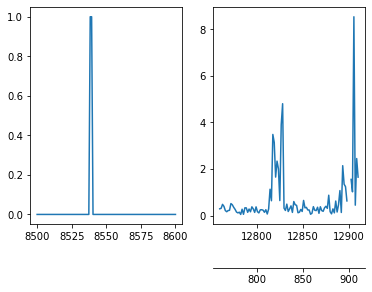

In [156]:
## input regions to search from binned dataframe, convert to behavCam frame inidcies
sample_region_aligned_df = (8500, 8600)
behavCam_frame_indicies = (int(aligned_td.iloc[sample_region_aligned_df[0]]['behavCam_frames']), int(aligned_td.iloc[sample_region_aligned_df[1]]['behavCam_frames']))
print(behavCam_frame_indicies)

fig, (ax1, ax2) = plt.subplots(1, 2)
#plot of binned dataframe, x axis is from aligned dataframe (miniscope camera index)
ax1.plot(np.linspace(sample_region_aligned_df[0], sample_region_aligned_df[1], sample_region_aligned_df[1]-sample_region_aligned_df[0]),
         binned_df[sample_region_aligned_df[0]:sample_region_aligned_df[1]])
#plot of velocity from behavCam, x axis is behavCam index from aligned dataframe 
ax2.plot(np.linspace(aligned_td.iloc[sample_region_aligned_df[0]]['behavCam_frames'], aligned_td.iloc[sample_region_aligned_df[1]]['behavCam_frames'],
           sample_region_aligned_df[1]-sample_region_aligned_df[0]),
        aligned_td.iloc[sample_region_aligned_df[0]:sample_region_aligned_df[1]]['tail_base'])
ax2.secondary_xaxis(-.2, functions=(lambda x: x%1000, lambda x: x%1000))
print('start index is behavCam :' + str(dlc_utils.get_behavCam_avi_index(behavCam_frame_indicies[0])[0]) + '  frame: ' + str(dlc_utils.get_behavCam_avi_index(behavCam_frame_indicies[0])[1]))
print('stop index is behavCam :' + str(dlc_utils.get_behavCam_avi_index(behavCam_frame_indicies[1])[0]) + '  frame: ' + str(dlc_utils.get_behavCam_avi_index(behavCam_frame_indicies[1])[1]))

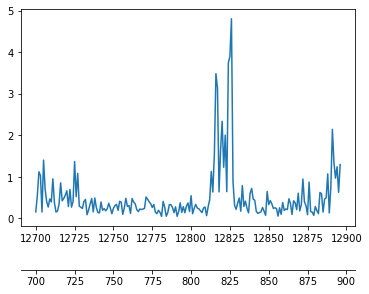

In [159]:
fig, ax = plt.subplots()
ax.plot(velocity_session_compiled['tail_base'][12700:12900])
ax.secondary_xaxis(-.2, functions=(lambda x: x%1000, lambda x: x%1000))

In [158]:
ani

In [148]:
#
video = av.open('/projects/b1118/behaviorvideos/GRIN012_H17_M46_S35/behavCam13DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4')
total_frames = video.streams.video[0].frames
movie_images = {}
for i, frame in enumerate(video.decode(video=0)):
    img = frame.to_image()  # PIL image
    movie_images[i] = img
    if i%1000==0:
        print("Frame: %d/%d ..." % (i, total_frames))
video.close()
movie_shape = np.shape(movie_images[1])

Frame: 0/1000 ...


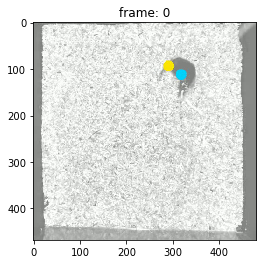

In [157]:
movie_shape = np.shape(movie_images[1])
frame_region = (800, 850)
frame_subset = [movie_images[i] for i in range(frame_region[0], frame_region[1])]
fig, ax = plt.subplots()
im = plt.imshow(frame_subset[0])
def init():
    ax.set_title("frame: "+str(0))
    im.set_data(frame_subset[0])
def animate(i):
    ax.set_title("frame: "+str(frame_region[0]+i))
    im.set_data(frame_subset[i])
    #ax2.axvline(x=(index-(50+i)), linestyle='--', color='r')
    return im
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frame_subset), interval=50)
rc('animation', html='jshtml')